<a href="https://colab.research.google.com/github/RitikaBishnoi18/Students_Scores_Analysis_Using_Python_Data_Science/blob/main/Student_score_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Students Score Analysis</h1>

**By:- Ritika Bishnoi**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("student_scores.csv")
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [ ]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [ ]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

<h1>Drop Unnamed Column</h1>

In [ ]:
df=df.drop("Unnamed: 0",axis=1)
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


<h1>Gender Distribution</h1>

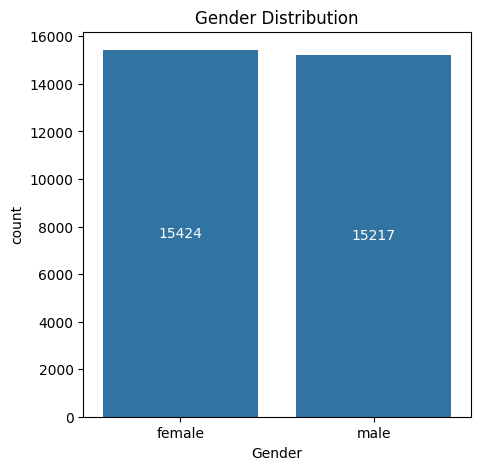

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data=df,x="Gender")
ax.bar_label(ax.containers[0],label_type="center",color="white")
plt.title("Gender Distribution")
plt.show()
plt.savefig("Gender Distribution.png")

**Analysis :- The number of female students is slightly more than number of male students**

<h1>Impact Of Parent's Eduction On student's Score</h1>

In [ ]:
gp=df.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
gp

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


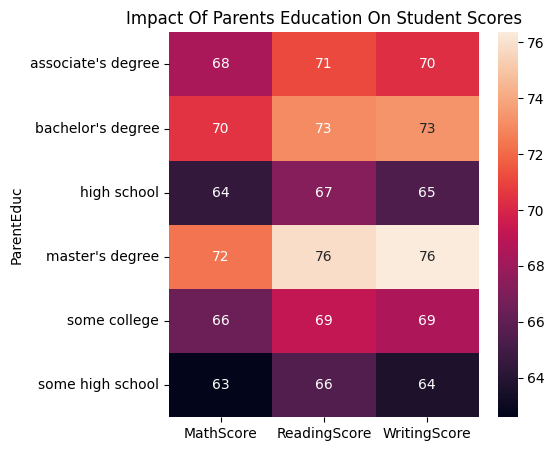

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(gp,annot=True)
plt.title("Impact Of Parents Education On Student Scores")
plt.show()
plt.savefig("Impact Of Parents Education On Student Scores.png")

**Analysis:- The higher the Education of parent the more is the average marks of their children**

<h1>Impact Of Parent's Marital Status On Student's Scores</h1>

In [ ]:
gg=df.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
gg

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


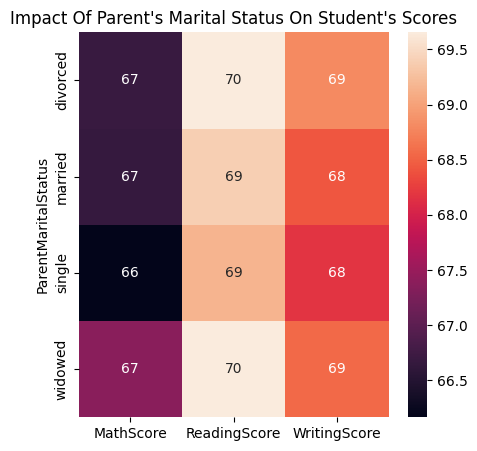

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(gg,annot=True)
plt.title("Impact Of Parent's Marital Status On Student's Scores")
plt.show()
plt.savefig("Impact Of Parent's Marital Status On Student's Scores.png")

**Analysis:- The marital Status Of parent has negligiable or no impact on their child's score**

<h1>Finding Outliers</h1>

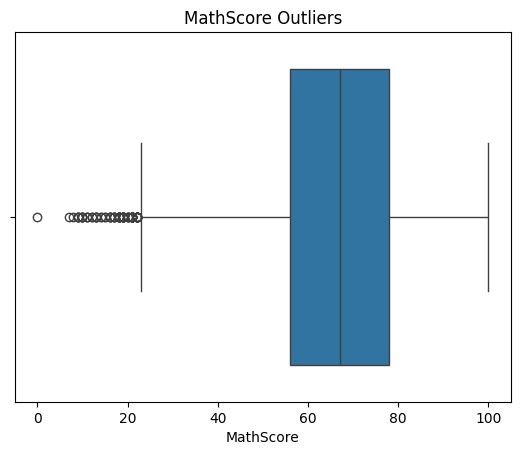

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.boxplot(data=df,x="MathScore")
plt.title("MathScore Outliers")
plt.show()
plt.savefig("MathScore Outliers")

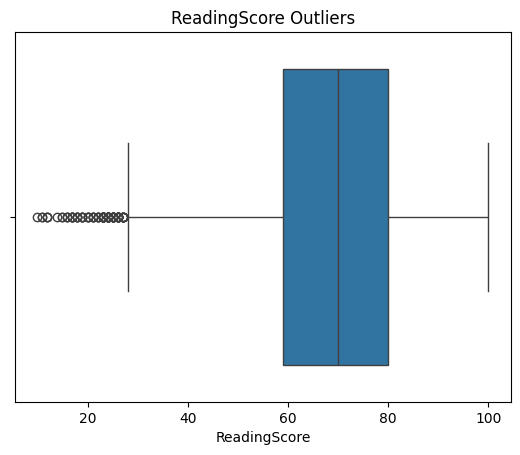

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.boxplot(data=df,x="ReadingScore")
plt.title("ReadingScore Outliers")
plt.show()
plt.savefig("ReadingScore Outliers")

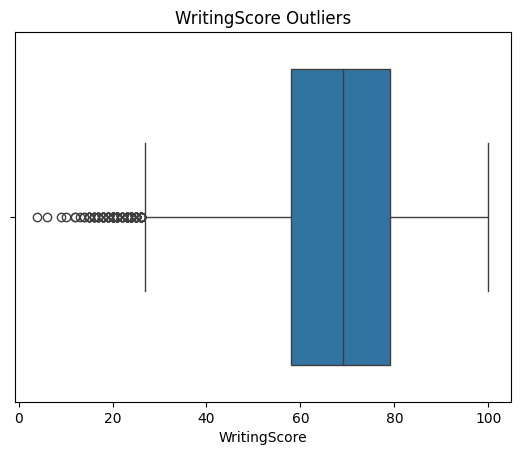

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.boxplot(data=df,x="WritingScore")
plt.title("WritingScore Outliers")
plt.show()
plt.savefig("WritingScore Outliers")

**Analysis:- All three scores have lots of outlier , the most scattered one is Maths followed by Writing and finally Reading**

**This means Maths is hardest for the students**

<h1>Distribution Of Ethnic Group</h1>

In [ ]:
df["EthnicGroup"]

0            NaN
1        group C
2        group B
3        group A
4        group C
          ...   
30636    group D
30637    group E
30638        NaN
30639    group D
30640    group B
Name: EthnicGroup, Length: 30641, dtype: object

**Removing Null Values**

In [ ]:
df["EthnicGroup"]=df["EthnicGroup"].replace(np.nan,"Other")
df["EthnicGroup"]

0          Other
1        group C
2        group B
3        group A
4        group C
          ...   
30636    group D
30637    group E
30638      Other
30639    group D
30640    group B
Name: EthnicGroup, Length: 30641, dtype: object

In [ ]:
eg=df.groupby("EthnicGroup").EthnicGroup.count()
eg
#using df.groupby("EthnicGroup").agg("EthnicGroup":"count")would give 2D array for eg.value
#but this method gave 1D array compatible to use .values in pie chart"""

EthnicGroup
Other      1840
group A    2219
group B    5826
group C    9212
group D    7503
group E    4041
Name: EthnicGroup, dtype: int64

In [ ]:
eg.values

array([1840, 2219, 5826, 9212, 7503, 4041])

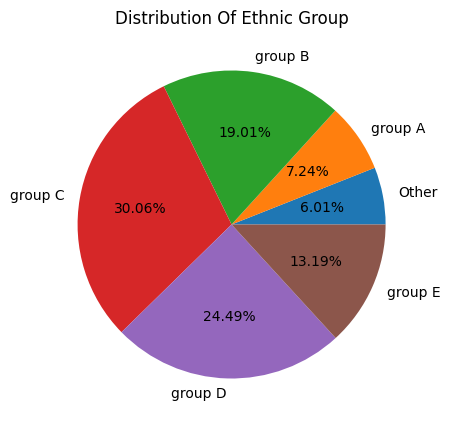

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(eg.values,labels=eg.index,autopct="%1.2f%%")
plt.title("Distribution Of Ethnic Group")
plt.show()
plt.savefig("Distribution Of Ethnic Group.png")

<h1>Grade Wise Students Distribution</h1>

In [ ]:
df["Overall Percentage"]=((df["MathScore"]+df["ReadingScore"]+df["WritingScore"])/3)
df["Overall Percentage"]=np.round(df["Overall Percentage"],2)
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Overall Percentage
0,female,Other,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,72.00
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,82.33
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,90.33
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42,47.67
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,76.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65,61.67
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51,54.00
30638,female,Other,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67,66.00
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93,88.33


In [ ]:
df.loc[df["Overall Percentage"] >= 90, "Grade"] = "A"
df.loc[(df["Overall Percentage"] >= 80) & (df["Overall Percentage"] < 90), "Grade"] = "B"
df.loc[(df["Overall Percentage"] >= 70) & (df["Overall Percentage"] < 80), "Grade"] = "C"
df.loc[(df["Overall Percentage"] >= 60) & (df["Overall Percentage"] < 70), "Grade"] = "D"
df.loc[(df["Overall Percentage"] >= 50) & (df["Overall Percentage"] < 60), "Grade"] = "E"
df.loc[df["Overall Percentage"] < 50, "Grade"] = "F"
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Overall Percentage,Grade
0,female,Other,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,72.00,C
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,82.33,B
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,90.33,A
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42,47.67,F
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,76.33,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65,61.67,D
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51,54.00,E
30638,female,Other,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67,66.00,D
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93,88.33,B


In [ ]:
gt=df.groupby("Grade").Grade.count()
gt

Grade
A    2082
B    4779
C    7245
D    7777
E    5485
F    3273
Name: Grade, dtype: int64

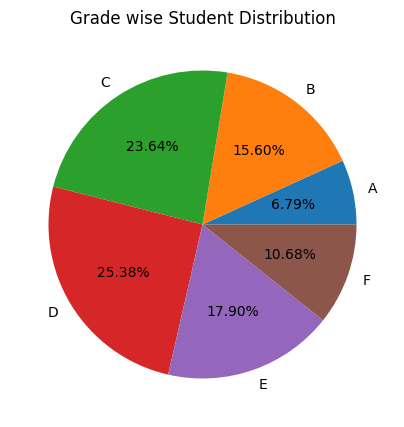

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(gt.values,labels=gt.index,autopct="%1.2f%%")
plt.title("Grade wise Student Distribution")
plt.show()
plt.savefig("Grade wise Student Distribution.png")

**Analysis:- Nearly 25% of the total Students scored bad other 25% total students scored good rest 50% of students scored average**

<h1>Impact Of Practicing Sports On Student's Grade</h1>

In [ ]:
n=df.groupby(["Grade","PracticeSport"]).PracticeSport.count()#gets aggregated values for group Grade subgroup by Practice Sport
p1=n.index.get_level_values(0)#Sequentially get all values of grade for all rows
p2=n.index.get_level_values(1)#Sequentially get all the values of Practice Sport for all rows
#n.values-> Show all the count we have of each practice score for each group
n

Grade  PracticeSport
A      never             166
       regularly         938
       sometimes         930
B      never             573
       regularly        1735
       sometimes        2383
C      never             950
       regularly        2561
       sometimes        3589
D      never            1028
       regularly        2672
       sometimes        3910
E      never             777
       regularly        1838
       sometimes        2743
F      never             510
       regularly        1049
       sometimes        1658
Name: PracticeSport, dtype: int64

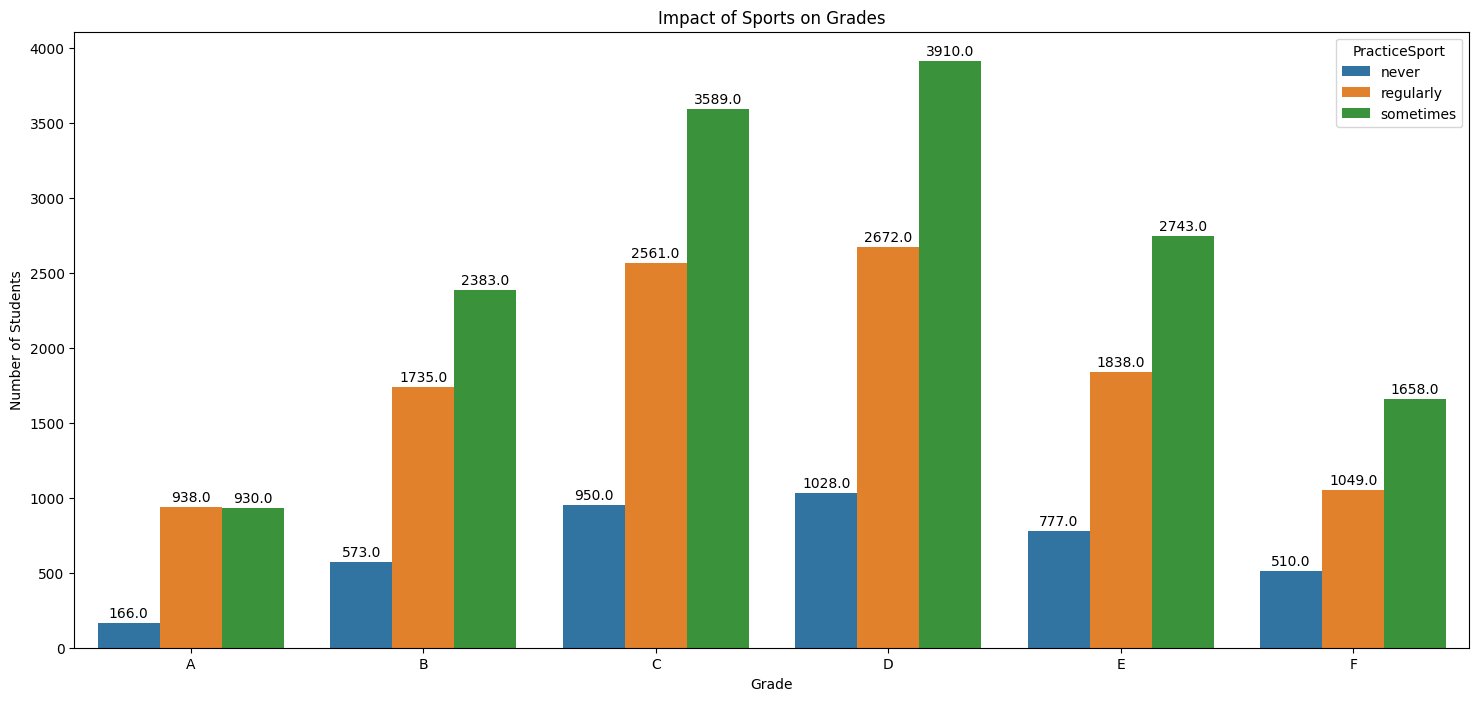

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(18,8))
ax=sns.barplot(x=p1,y=n.values,hue=p2)
#x-axis-> grade
#y-axis->count
#hue-> subgroup->Practice Sport
for container in ax.containers:
    labels = [f"{bar.get_height()}" for bar in container]  # Get bar heights
    ax.bar_label(container, labels=labels, padding=2)   # Add labels with padding
plt.title("Impact of Sports on Grades")
plt.ylabel("Number of Students")
plt.show()
plt.savefig("Impact of Sports on Grades.png")

Based on this chart we can say that Playing sports

**Analysis:- Students who practice sports "sometimes" tend to achieve better grades compared to those who "never" or "regularly" practice sports. This trend is consistent across grades A to E, indicating a potential positive impact of moderate sports participation on academic performance.**

**In conclusion, engaging in sports occasionally appears to be beneficial for students' grades, highlighting the importance of balanced physical activity in their academic success**.

In [ ]:
g1=df.groupby(["WklyStudyHours","Grade"]).Grade.count()
print(g1)

WklyStudyHours  Grade
5 - 10          A        1144
                B        2624
                C        3817
                D        4090
                E        2890
                F        1681
< 5             A         398
                B        1128
                C        1938
                D        2175
                E        1601
                F         998
> 10            A         466
                B         890
                C        1258
                D        1263
                E         838
                F         487
Name: Grade, dtype: int64


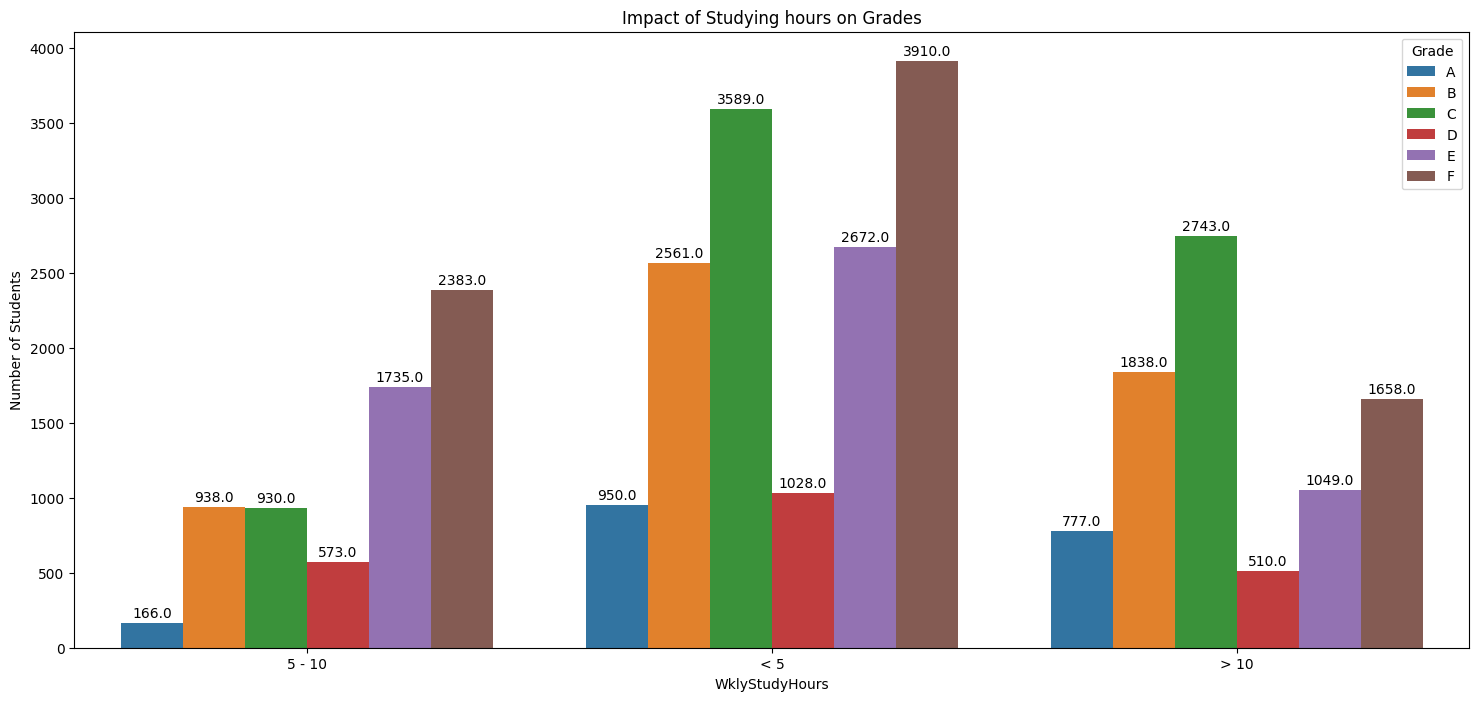

<Figure size 640x480 with 0 Axes>

In [ ]:
i1=g1.index.get_level_values(0)#Sequentially get all values of grade for all rows
i2=g1.index.get_level_values(1)
plt.figure(figsize=(18,8))
ax=sns.barplot(x=i1,y=n.values,hue=i2)
#x-axis-> grade
#y-axis->count
#hue-> subgroup->Practice Sport
for container in ax.containers:
    labels = [f"{bar.get_height()}" for bar in container]  # Get bar heights
    ax.bar_label(container, labels=labels, padding=2)   # Add labels with padding
plt.title("Impact of Studying hours on Grades")
plt.ylabel("Number of Students")
plt.show()
plt.savefig("Impact of Studying hours on Grades.png")

**Average Percentage based on Student's Working Hour**

In [ ]:
g2=df.groupby("WklyStudyHours")
g2=g2["Overall Percentage"].mean()
print(g2)

WklyStudyHours
5 - 10    68.389081
< 5       66.615526
> 10      69.613297
Name: Overall Percentage, dtype: float64


**Analysis:- As the number of studying hour increases the count of the students scoring bad grades decreases**

**On an average the best result is obtained in case when students study for more than 10 hours a day.**